# Logistic Regression examples

https://medium.com/@curryrowan/simplified-logistic-regression-classification-with-categorical-variables-in-python-1ce50c4b137
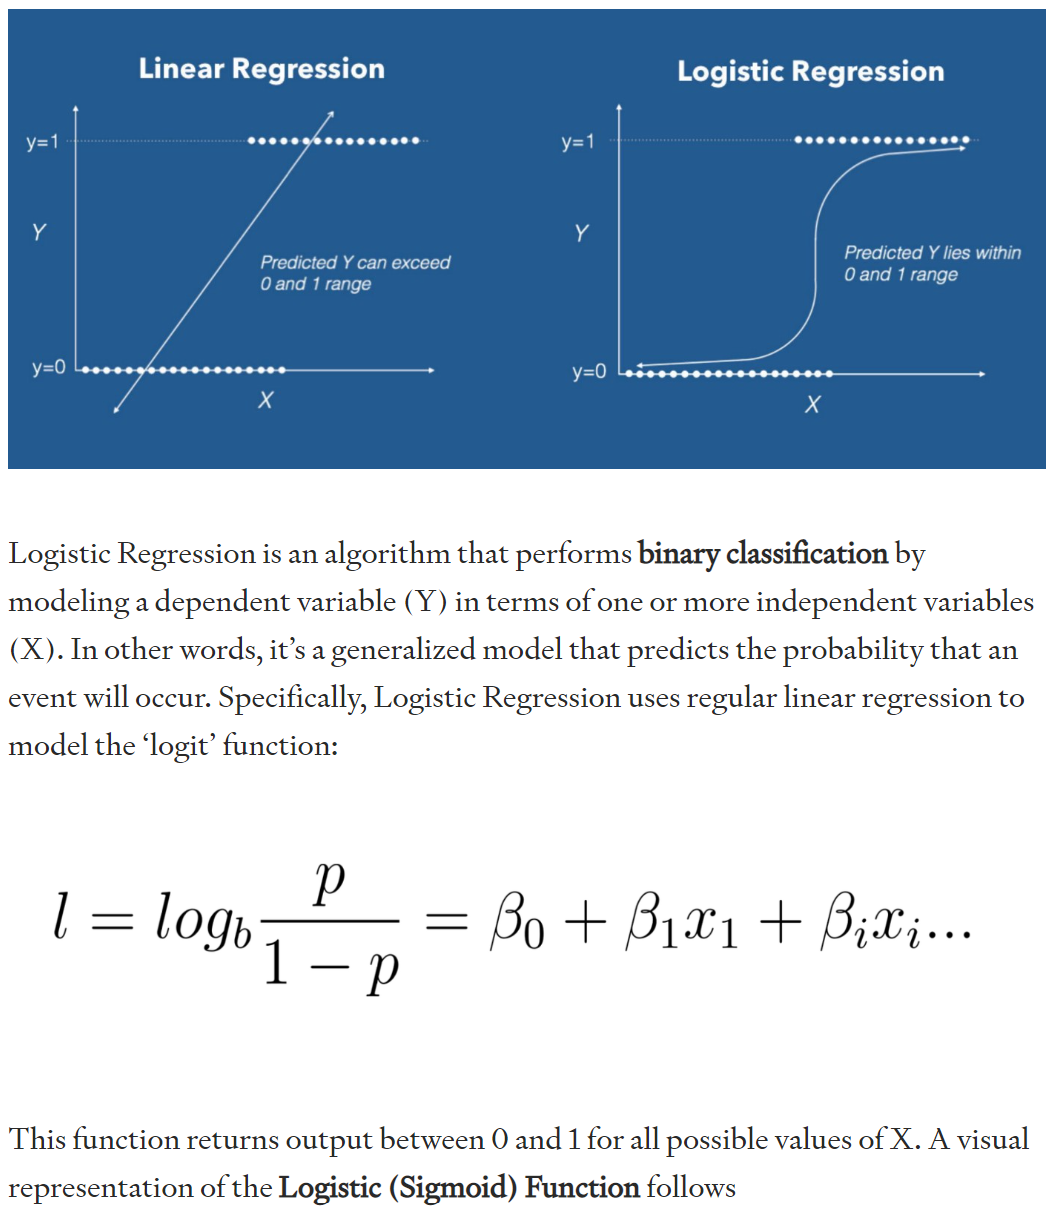
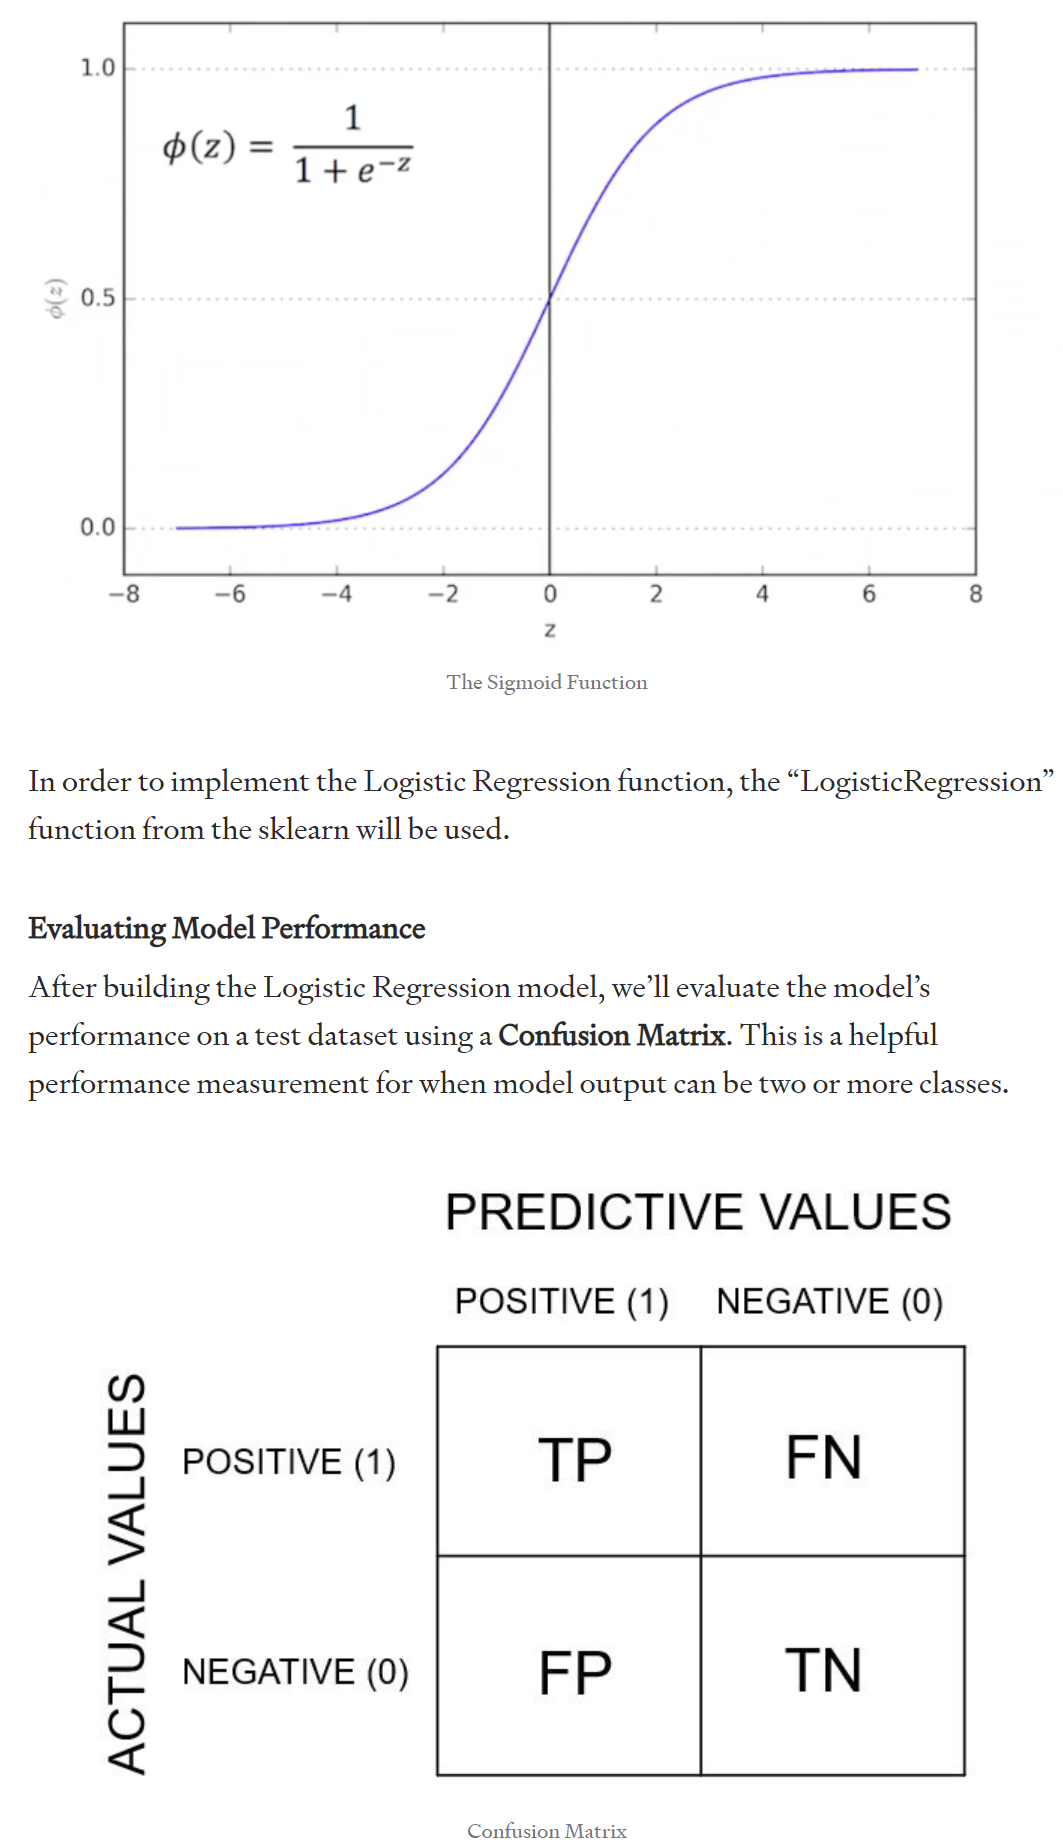
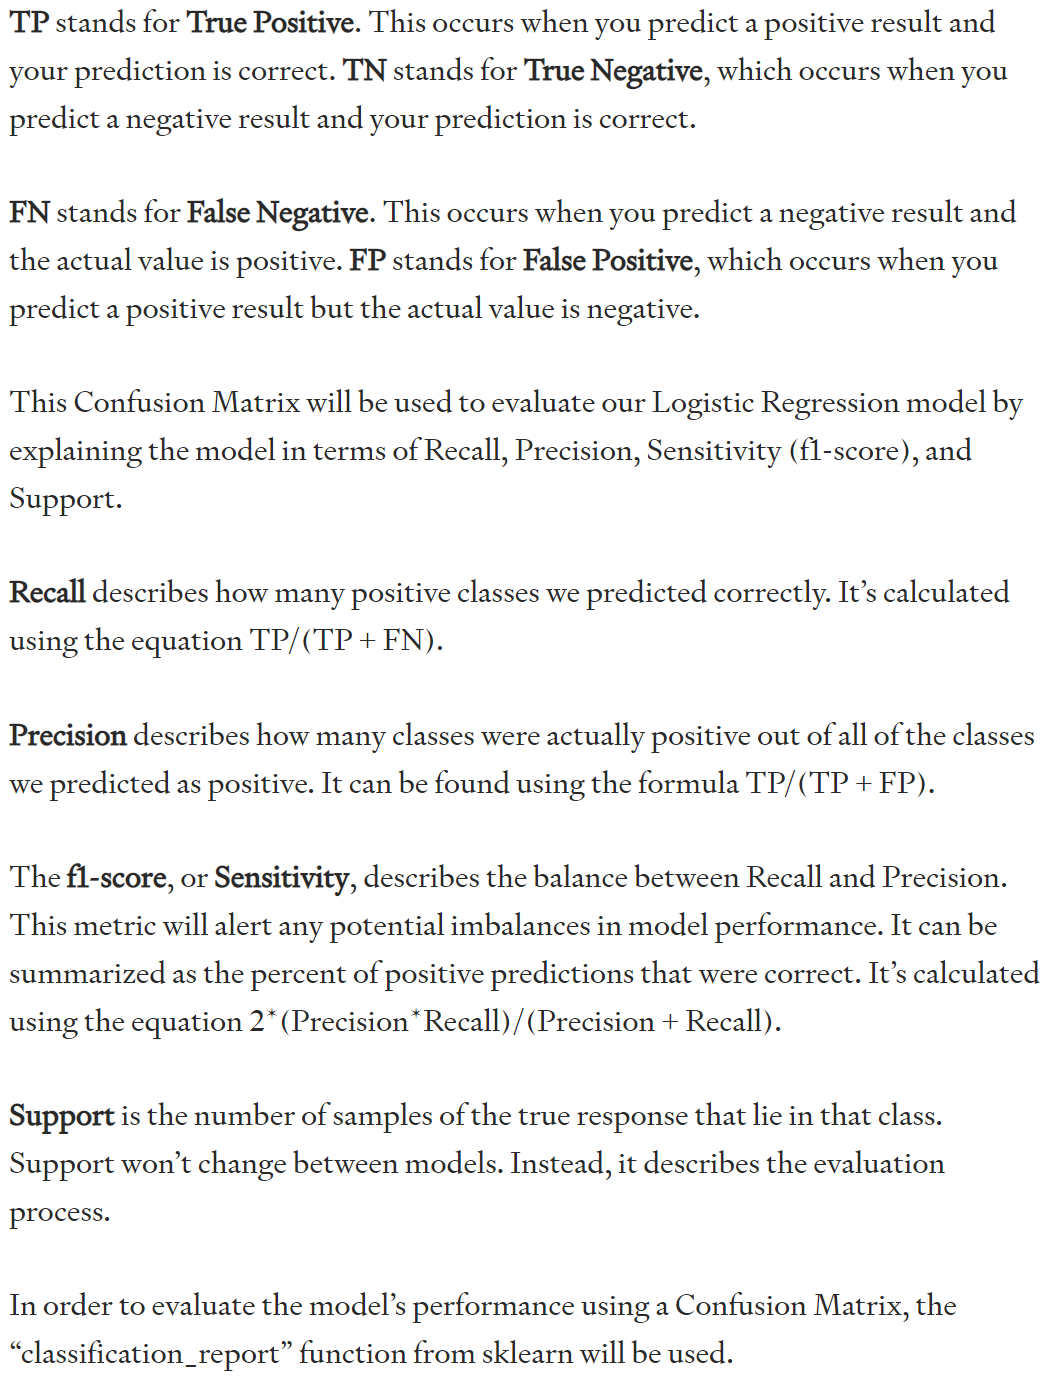

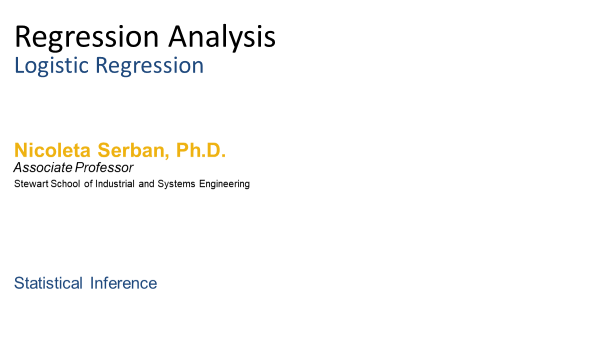
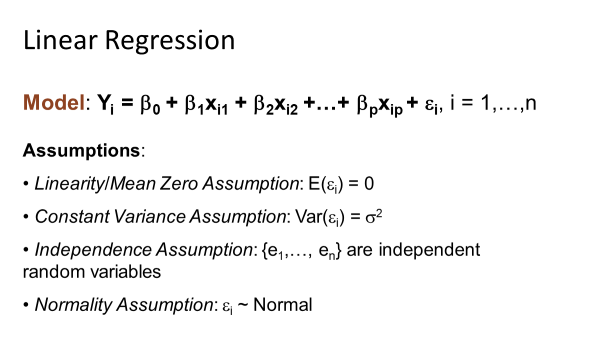

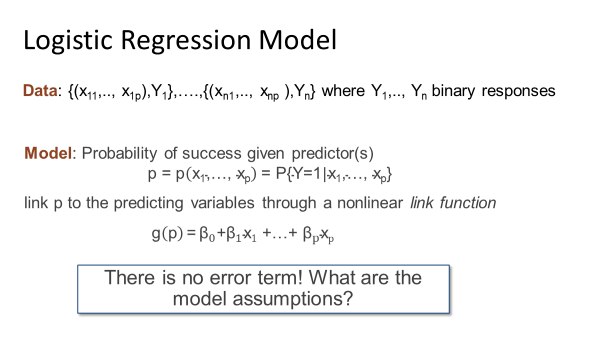
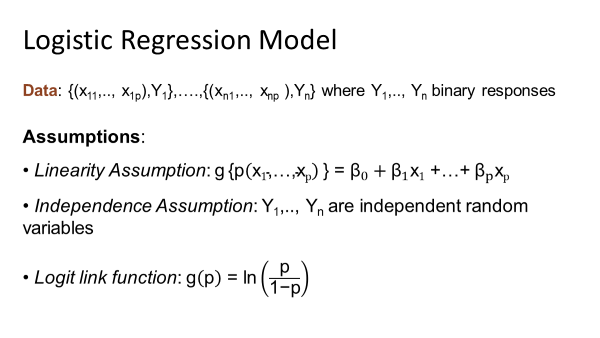
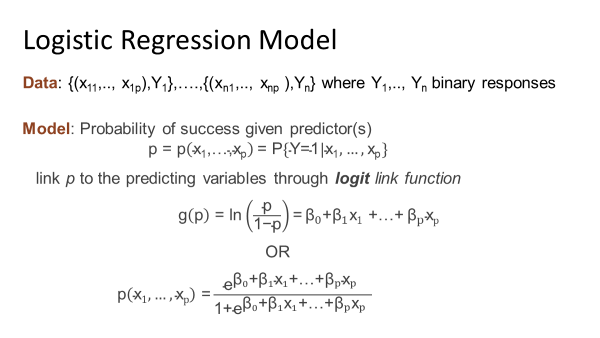
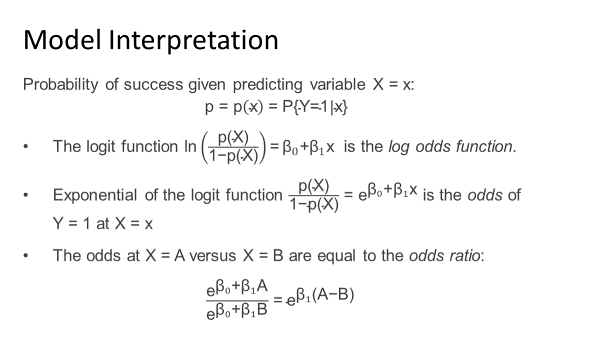
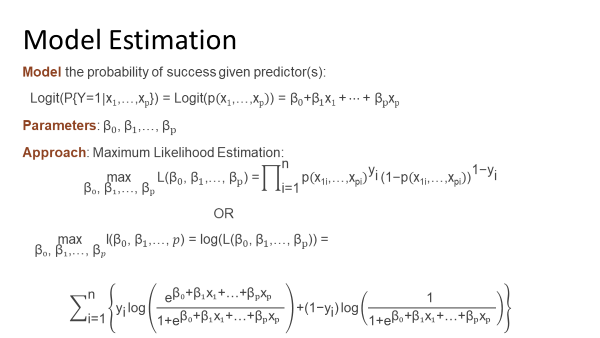
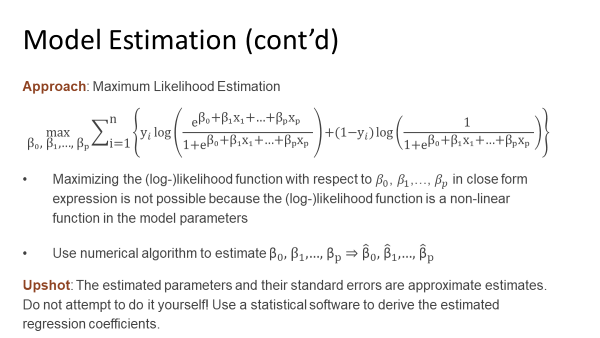
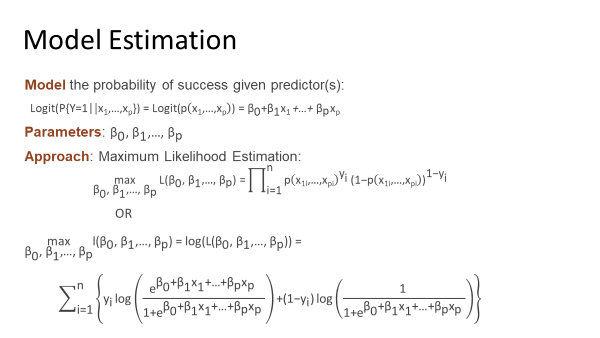
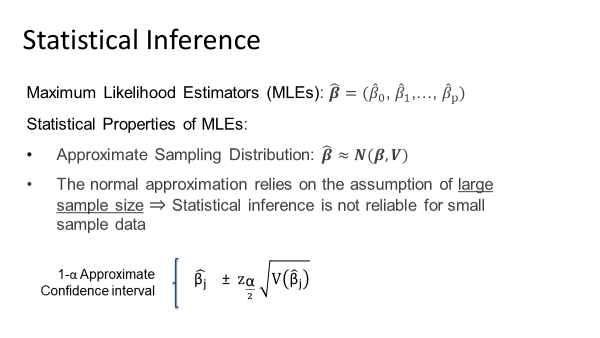
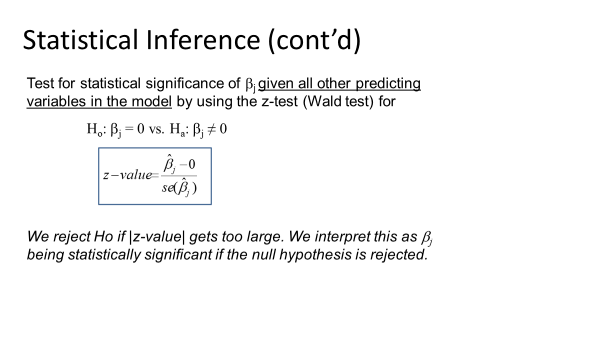
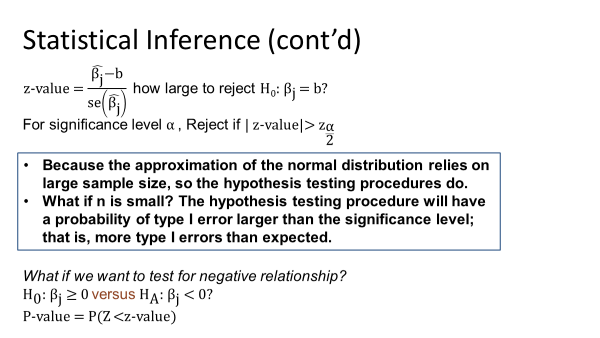

### Logitic Regression example number 1 - Iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell # make all output in ipython show, not just last line
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

### Logistic Regression with three classes using sklearn Logistic Regression

Output is three probabilities and the highest probability is the intended class.  The classifier coefficients are an array of three rows and four columns.  Each row is the coefficients for a class (0, 1 or 2).  Each column is one of the four predictors.


In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X, y = load_iris(return_X_y=True)
print('X[:5]:\n',X[:5])
clf = LogisticRegression(random_state=0).fit(X, y)
print("params:\n",clf.get_params(deep=True))
print("predict ",X[:2,:],"\nwith y = ",y[:2],"\n predictions\n")
clf.predict(X[:2, :])
# predict_proba returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.
print("Prediction probabilty")
clf.predict_proba(X[:2, :]) 
print("Score:")
clf.score(X, y)  # Mean accuracy of self.predict(X) wrt. y.
print("\n",classification_report(y,clf.predict(X)))  # predict gives the percentage, so round gives 0 or 1
print("\naccuracy score: ",accuracy_score(y, clf.predict(X)))
print("Classifier coefficients: ",clf.coef_)

X[:5]:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
params:
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
predict  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]] 
with y =  [0 0] 
 predictions



c:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0])

Prediction probabilty


array([[9.81799203e-01, 1.82007824e-02, 1.44272072e-08],
       [9.71729178e-01, 2.82707921e-02, 3.01668533e-08]])

Score:


0.9733333333333334


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


accuracy score:  0.9733333333333334
Classifier coefficients:  [[-0.41809633  0.96631312 -2.52108826 -1.08408296]
 [ 0.53036196 -0.31441875 -0.19941437 -0.94827967]
 [-0.11226563 -0.65189437  2.72050263  2.03236264]]


### Modeling again using statsmodels
Note that we dropped all the y values = 0 so all we have left are 1 and 2 which were changed to 0 and 1.  This gives a binary logistic regression.

Given all the other variables unchanged, a unit change in x1 leads to a decrease in the log odds of 6.3277.  This leads to an increase in the odds of category 1 by 0.00178.  Since odds = p/(1-p) then the probability is odds/(1 + odds).  A change in the odds of 0.00178 leads to a change in probability of 0.00178/1.00178 = 0.00178

In [3]:
X = X[y >0]
y = y[y > 0]
y = y - 1
len(X)
len(y)

100

100

In [4]:
import statsmodels.api as sm


logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.108399
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 May 2022   Pseudo R-squ.:                  0.8436
Time:                        22:38:46   Log-Likelihood:                -10.840
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 3.502e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.3277      2.479     -2.552      0.011     -11.187      -1.468
x2            -6.6182      2

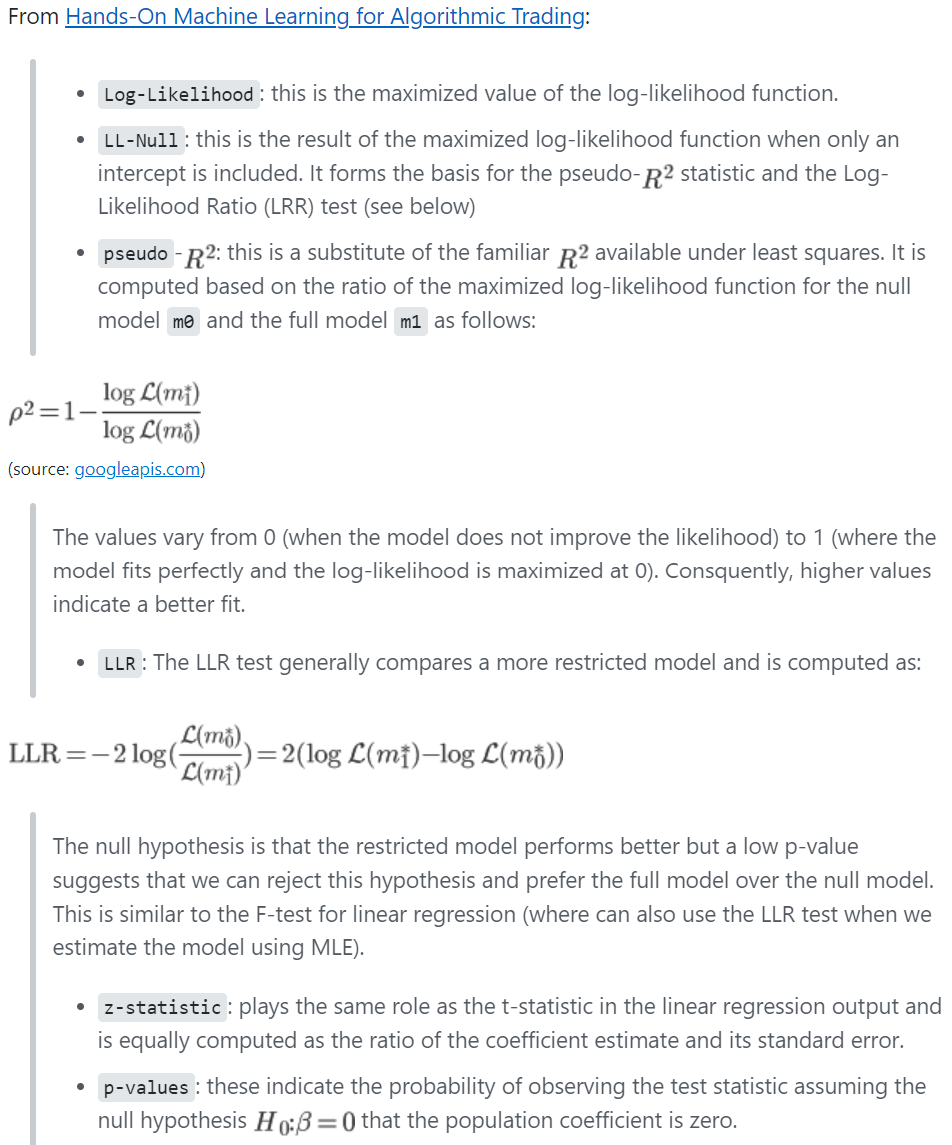

### Example 2, some random data plotted with regression line

LogisticRegression(C=100000.0)

<Figure size 720x432 with 0 Axes>

LinearRegression()

Text(0, 0.5, 'y')

Text(0.5, 0, 'X')

([<matplotlib.axis.XTick at 0x21208423970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x21208434250>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(-0.25, 1.25)

(-4.0, 10.0)

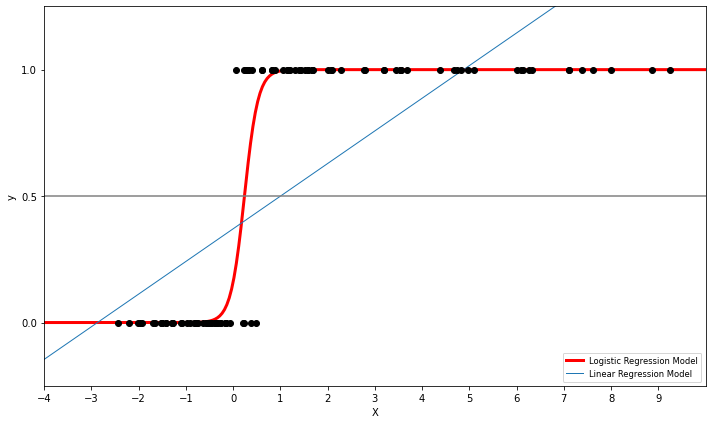


               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        45
         1.0       0.96      0.96      0.96        55

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


accuracy score:  0.96

confusion matrix:
 [[43  2]
 [ 2 53]]


In [5]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.special import expit

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.scatter(X.ravel(), y, color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    ("Logistic Regression Model", "Linear Regression Model"),
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()
print("\n",classification_report(y,clf.predict(X)))  # predict gives the percentage, so round gives 0 or 1
print("\naccuracy score: ",accuracy_score(y, clf.predict(X)))
print("\nconfusion matrix:\n",confusion_matrix(y, clf.predict(X)))

Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'Zero'), Text(1.5, 0, 'One')]

[Text(0, 0.5, 'Zero'), Text(0, 1.5, 'One')]

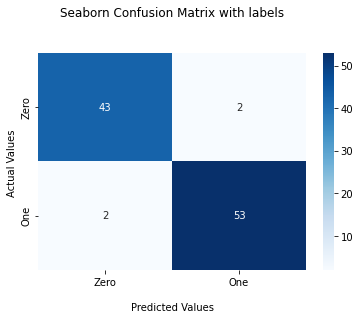

In [6]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y, clf.predict(X)), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Zero','One'])
ax.yaxis.set_ticklabels(['Zero','One'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Model this data again with statsmodels so we can see the coefficients easier

Note that the coefficient for x1 is 5.4178.  This means for each unit change in value of X, the log odds of being in category 1 increases by 5.4178.  This also means the odds increases by 225.

In [7]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.122946
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 24 May 2022   Pseudo R-squ.:                  0.8213
Time:                        22:38:47   Log-Likelihood:                -12.295
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.4178      1.510      3.589      0.000       2.459       8.376

Possibly complete quasi-sep

In [8]:
# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.122946
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 24 May 2022   Pseudo R-squ.:                  0.8213
Time:                        22:38:47   Log-Likelihood:                -12.295
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.4178      1.510      3.589      0.000       2.459       8.376

Possibly complete quasi-sep

# Example 3, obesity data

First approach will use the variables as-is, then we will convert them to dummy variables and try again.  We will also not address the imbalance between the groups until later.

In [9]:
df = pd.read_csv("testobesitydata.txt", sep = ' ')
df.dtypes
df

FileNotFoundError: [Errno 2] No such file or directory: 'testobesitydata.txt'

In [ ]:
df['Obesity'].sum()  # 40.1% of people are obese.  Guessing everyone is not obese gives a 59.9% accuracy

401

<AxesSubplot:ylabel='AgeGroup'>

Text(0.5, 1.0, 'Percentage of Obese by age group')

Text(0.5, 0, 'percentage')

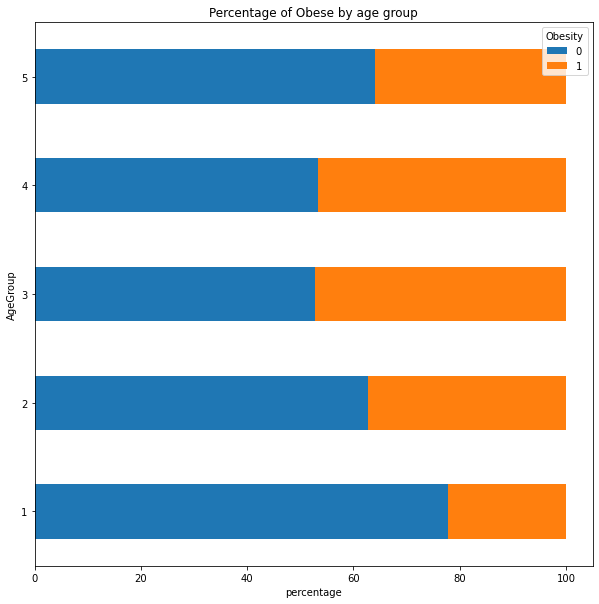

In [ ]:
stacked_data = df.groupby(['AgeGroup','Obesity'])['Obesity'].count().unstack(1).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True)
plt.title("Percentage of Obese by age group")
plt.xlabel("percentage")

,Obesity,Gender,AgeGroup,Education
0,Obese,Female,65+,Some College
1,Not Obese,Female,45-64,Some College
2,Obese,Male,45-64,Some College
3,Obese,Male,18-24,Some College
4,Not Obese,Male,45-64,Some College
...,...,...,...,...
995,Not Obese,Male,65+,<9th Grade
996,Obese,Male,45-64,High School
997,Not Obese,Male,18-24,College+
998,Not Obese,Female,65+,College+


<AxesSubplot:title={'center':'Age vs Obesity'}, ylabel='AgeGroup'>

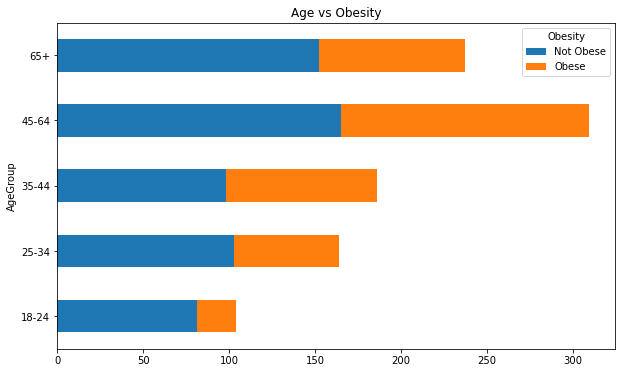

In [ ]:
# make a copy so the plots are automatically labeled and we can change them to categorical, but leave df for the numeric values
df2 = df.copy()
df2['Gender'] = df2['Gender'].replace({1:'Male', 2:'Female'}).copy()
df2['AgeGroup'] = df2['AgeGroup'].replace({1:'18-24', 2:'25-34', 3:'35-44', 4:'45-64', 5:'65+'})
df2['Education'] = df2['Education'].replace({1:'<9th Grade', 2:'9-11', 3:'High School', 4:'Some College', 5:'College+'})
df2['Obesity'] = df2['Obesity'].replace({0:'Not Obese', 1:'Obese'})
df2

df2.groupby(['AgeGroup','Obesity'])['Obesity'].count().unstack(1).plot(kind='barh', stacked=True,title='Age vs Obesity', figsize=(10, 6))

<AxesSubplot:title={'center':'Education vs Obesity'}, ylabel='Education'>

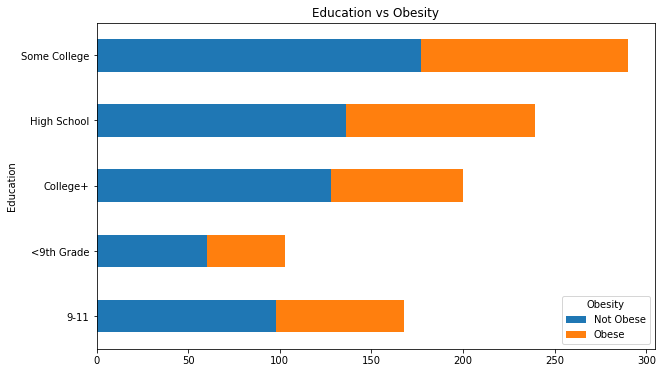

In [ ]:
df2.groupby(['Education','Obesity'])['Obesity'].count().unstack(1).plot(kind='barh', stacked=True,title='Education vs Obesity', figsize=(10, 6))

<AxesSubplot:ylabel='Education'>

Text(0.5, 1.0, 'Percentage of Obese by Education')

Text(0.5, 0, 'percentage')

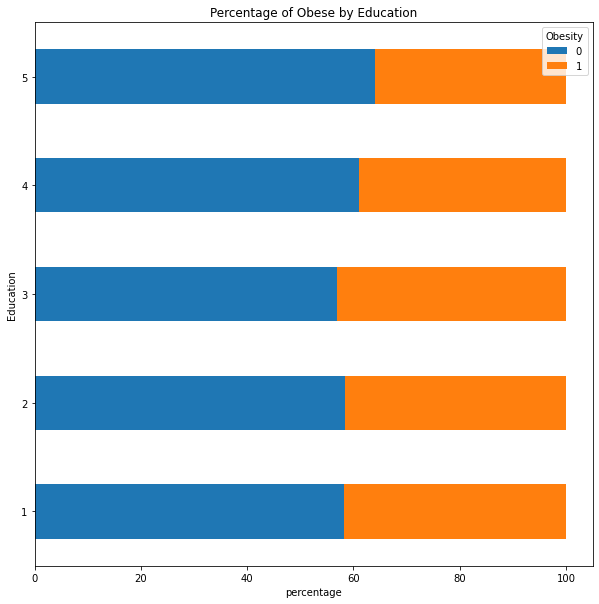

In [ ]:
stacked_data = df.groupby(['Education','Obesity'])['Obesity'].count().unstack(1).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True)
plt.title("Percentage of Obese by Education")
plt.xlabel("percentage")

<AxesSubplot:title={'center':'Gender vs Obesity'}, ylabel='Gender'>

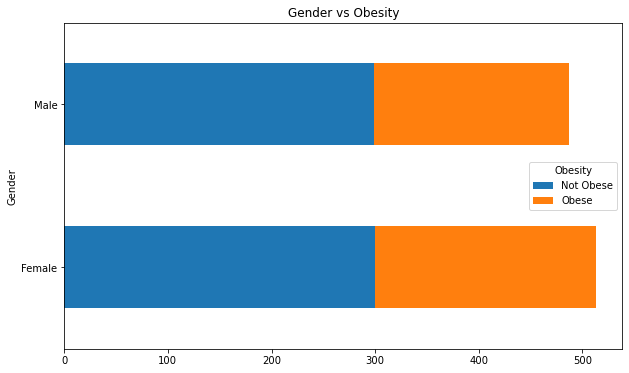

In [ ]:
df2.groupby(['Gender','Obesity'])['Obesity'].count().unstack(1).plot(kind='barh', stacked=True,title='Gender vs Obesity', figsize=(10, 6))

<AxesSubplot:ylabel='Gender'>

Text(0.5, 1.0, 'Percentage of Obese by Gender')

Text(0.5, 0, 'percentage')

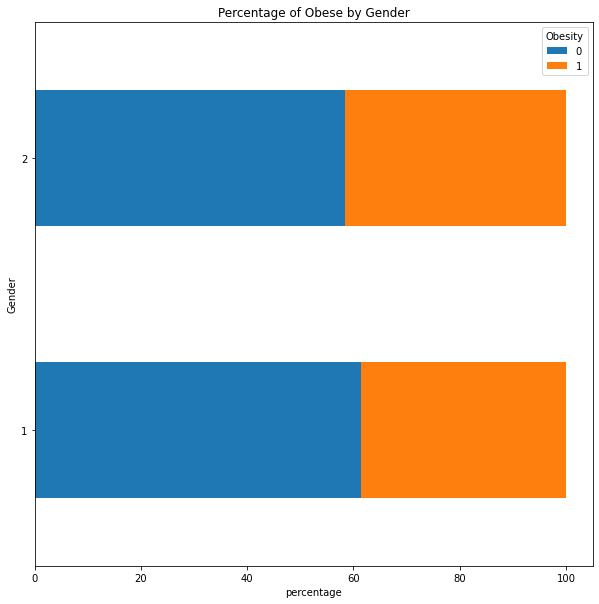

In [ ]:
stacked_data = df.groupby(['Gender','Obesity'])['Obesity'].count().unstack(1).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True)
plt.title("Percentage of Obese by Gender")
plt.xlabel("percentage")

### Using all variables as numeric using df

In [ ]:
# Fit the classifier
clf = LogisticRegression()
X = df[['Gender','AgeGroup','Education']]
clf.fit(X, df['Obesity'])
print("params:\n",clf.get_params(deep=True))

print("predict \n",X.iloc[0:1],"\nwith y = ",df.iloc[1]['Obesity'],"\n predictions\n")
clf.predict(X.iloc[0:2])  # predict the first two rows of data
# predict_proba returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.
print("Prediction probabilty for first two rows.  Actual is: ",df.iloc[0:1]['Obesity'])
clf.predict_proba(X) # predicts probabilty for each class.  Left number is class zero probability, right number is class 1 probability
print("Score:")
clf.score(X, df['Obesity'])  # Mean accuracy of self.predict(X) wrt. y.
print("Coefficients: ",clf.coef_)

LogisticRegression()

params:
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
predict 
    Gender  AgeGroup  Education
0       2         5          4 
with y =  0 
 predictions



array([0, 0], dtype=int64)

Prediction probabilty for first two rows.  Actual is:  0    1
Name: Obesity, dtype: int64


array([[0.55502464, 0.44497536],
       [0.57990949, 0.42009051],
       [0.61085311, 0.38914689],
       ...,
       [0.69306333, 0.30693667],
       [0.56963182, 0.43036818],
       [0.60081136, 0.39918864]])

Score:


0.599

Coefficients:  [[ 0.12849778  0.10140826 -0.05935556]]


<BarContainer object of 3 artists>

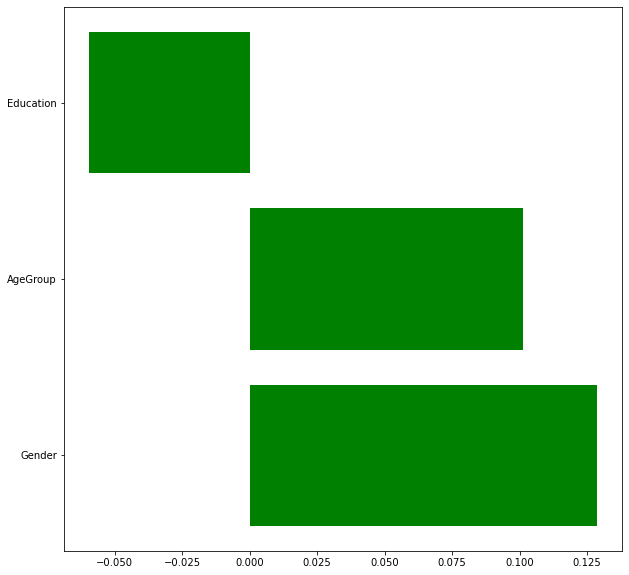

In [ ]:
# features with near zero coefficients indicate the model found those features unimportant

importance = clf.coef_.flatten()
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(['Gender','AgeGroup','Education'], importance,color='g')
plt.show()

<Figure size 720x720 with 0 Axes>

(-0.01, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

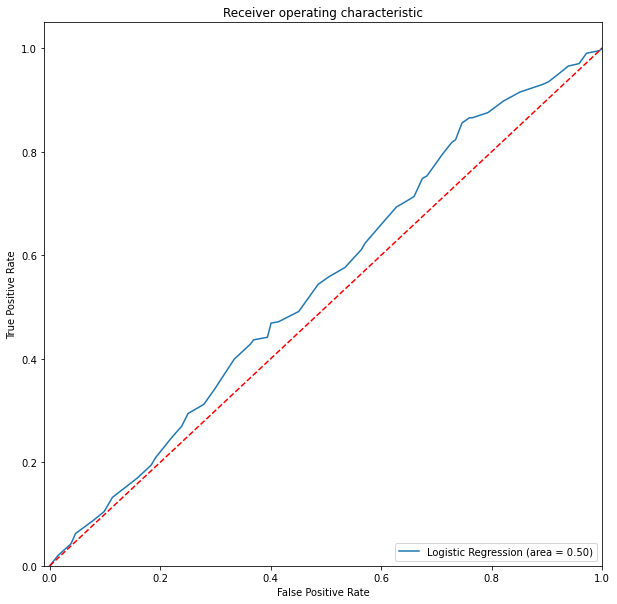

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#We calculate the roc auc
logit_roc_auc = roc_auc_score(df['Obesity'], clf.predict(X))

#We create the roc curve
fpr, tpr, thresholds = roc_curve(df['Obesity'], clf.predict_proba(X)[:,1])

#We plot the curve and the score :
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plot the random guess classifier performance
plt.plot([0, 1], [0, 1],'r--')

#Set x, y limits, labels, titles and legend :
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

#If you need to save the figure for later user (final report perhaps) :
plt.savefig('Log_ROC')

plt.show()

Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 69.0, '\nPredicted Values')

Text(69.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'Not Obese'), Text(1.5, 0, 'Obese')]

[Text(0, 0.5, 'Not Obese'), Text(0, 1.5, 'Obese')]

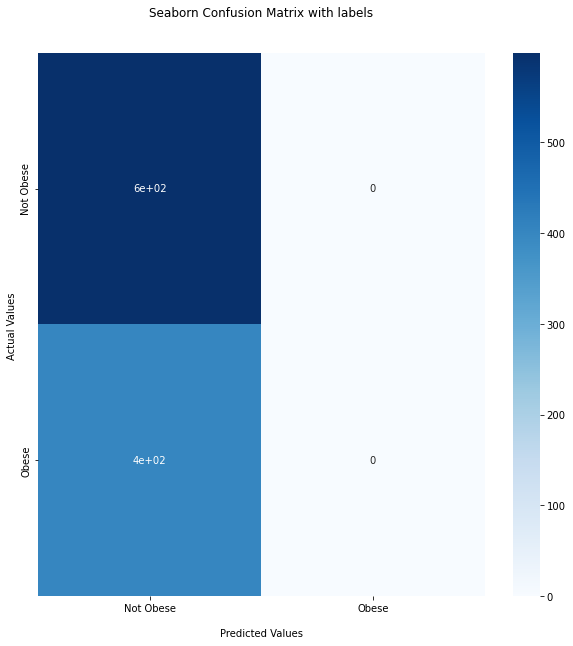

In [ ]:
ax = sns.heatmap(confusion_matrix(df['Obesity'], clf.predict(X)), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Obese','Obese'])
ax.yaxis.set_ticklabels(['Not Obese','Obese'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Obesity dataset with Statsmodels

Still using all variables as numeric instead of categories

In [ ]:
import statsmodels.api as smt
logit_model=sm.Logit(df['Obesity'],df[['Gender','AgeGroup','Education']])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.672681
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                Obesity   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 May 2022   Pseudo R-squ.:                0.001090
Time:                        18:36:20   Log-Likelihood:                -672.68
converged:                       True   LL-Null:                       -673.42
Covariance Type:            nonrobust   LLR p-value:                    0.4799
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -0.0467      0.104     -0.450      0.653      -0.250       0.157
AgeGroup       0.0331      0.

### Add constant to get a y-intercept

In [ ]:
import statsmodels.api as sm
X = df[['Gender','AgeGroup','Education']]
X = sm.add_constant(X)  # add constant to get y-intercept
logit_model=sm.Logit(df['Obesity'],X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.670040
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                Obesity   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 May 2022   Pseudo R-squ.:                0.005012
Time:                        18:36:20   Log-Likelihood:                -670.04
converged:                       True   LL-Null:                       -673.42
Covariance Type:            nonrobust   LLR p-value:                   0.08031
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7513      0.328     -2.288      0.022      -1.395      -0.108
Gender         0.1307      0.

C:\Users\donda\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

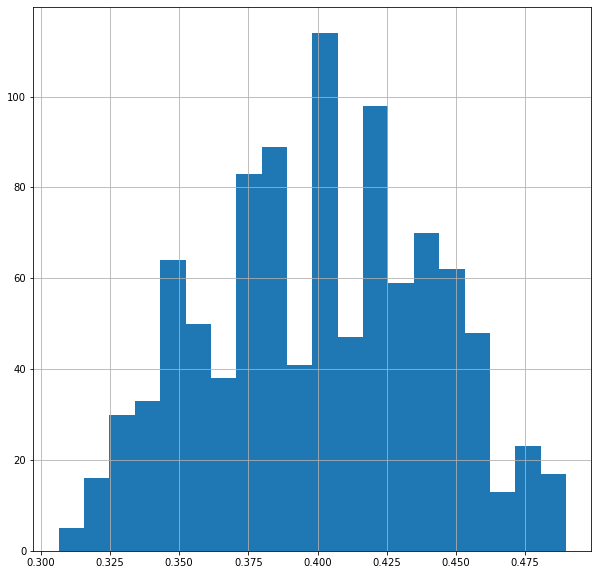

In [ ]:
result.predict(X).hist(bins=20)

### You can see adding the y-intercept improved the pseudo R^2 and the p-values, but it is still predicting all zeros

Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 69.0, '\nPredicted Values')

Text(69.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'Not Obese'), Text(1.5, 0, 'Obese')]

[Text(0, 0.5, 'Not Obese'), Text(0, 1.5, 'Obese')]

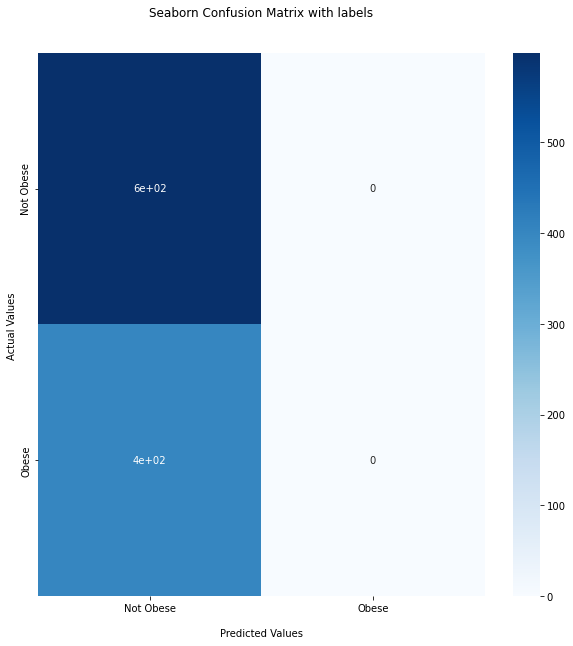

In [ ]:
ax = sns.heatmap(confusion_matrix(df['Obesity'], round(result.predict(X))), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Obese','Obese'])
ax.yaxis.set_ticklabels(['Not Obese','Obese'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
round(result.predict(X)).sum()
df['Obesity'].sum()

0.0

401

# Lets make all the variables categorical with pandas get_dummies

In [ ]:
# make a copy so the plots are automatically labeled and we can change them to categorical, but leave df for the numeric values
df2 = df.copy()
df2['Gender'] = df2['Gender'].replace({1:'Male', 2:'Female'}).copy()
df2['AgeGroup'] = df2['AgeGroup'].replace({1:'18-24', 2:'25-34', 3:'35-44', 4:'45-64', 5:'65+'})
df2['Education'] = df2['Education'].replace({1:'<9th Grade', 2:'9-11', 3:'High School', 4:'Some College', 5:'College+'})
df2['Obesity'] = df2['Obesity'].replace({0:'Not Obese', 1:'Obese'})
df2

,Obesity,Gender,AgeGroup,Education
0,Obese,Female,65+,Some College
1,Not Obese,Female,45-64,Some College
2,Obese,Male,45-64,Some College
3,Obese,Male,18-24,Some College
4,Not Obese,Male,45-64,Some College
...,...,...,...,...
995,Not Obese,Male,65+,<9th Grade
996,Obese,Male,45-64,High School
997,Not Obese,Male,18-24,College+
998,Not Obese,Female,65+,College+


In [ ]:
Gender = pd.get_dummies(df2['Gender'])
AgeGroup = pd.get_dummies(df2['AgeGroup'])
Education = pd.get_dummies(df2['Education'])
df3 = pd.concat([Gender, AgeGroup, Education], axis=1)
df3

,Female,Male,18-24,25-34,35-44,45-64,65+,9-11,<9th Grade,College+,High School,Some College
0,1,0,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,0,1,0,0,0
996,0,1,0,0,0,1,0,0,0,0,1,0
997,0,1,1,0,0,0,0,0,0,1,0,0
998,1,0,0,0,0,0,1,0,0,1,0,0


### Now lets fit to a scikit learn logistic model

In [ ]:
# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(df3, df['Obesity'])
print("params:\n",clf.get_params(deep=True))
print("predict ",df3.iloc[-1],"\nwith y = ",df.iloc[-1]['Obesity'],"\n predictions\n")
clf.predict(df3.iloc[-2:-1,:])
# predict_proba returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.
print("Prediction probabilty for last row.  Actual is: ",df.iloc[-1]['Obesity'])
clf.predict_proba(df3.iloc[-2:-1]) # predicts probabilty for each class - 56.9% for class 0, 43% for class 1
print("Score:")
clf.score(df3, df['Obesity'])  # Mean accuracy of self.predict(X) wrt. y.
print("Coefficients: ",clf.coef_)
predlog = clf.predict(df3)
print("\n",classification_report(df['Obesity'],predlog))

LogisticRegression(C=100000.0)

params:
 {'C': 100000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
predict  Female          0
Male            1
18-24           0
25-34           0
35-44           0
45-64           0
65+             1
9-11            0
<9th Grade      0
College+        1
High School     0
Some College    0
Name: 999, dtype: uint8 
with y =  0 
 predictions



array([0], dtype=int64)

Prediction probabilty for last row.  Actual is:  0


array([[0.67712144, 0.32287856]])

Score:


0.607

Coefficients:  [[-0.05889875 -0.2182885  -0.81097038 -0.0546911   0.37236611  0.34260284
  -0.12649472  0.00550814 -0.01969508 -0.27799308  0.08972611 -0.07473334]]

               precision    recall  f1-score   support

           0       0.61      0.92      0.74       599
           1       0.54      0.14      0.22       401

    accuracy                           0.61      1000
   macro avg       0.58      0.53      0.48      1000
weighted avg       0.58      0.61      0.53      1000



<BarContainer object of 12 artists>

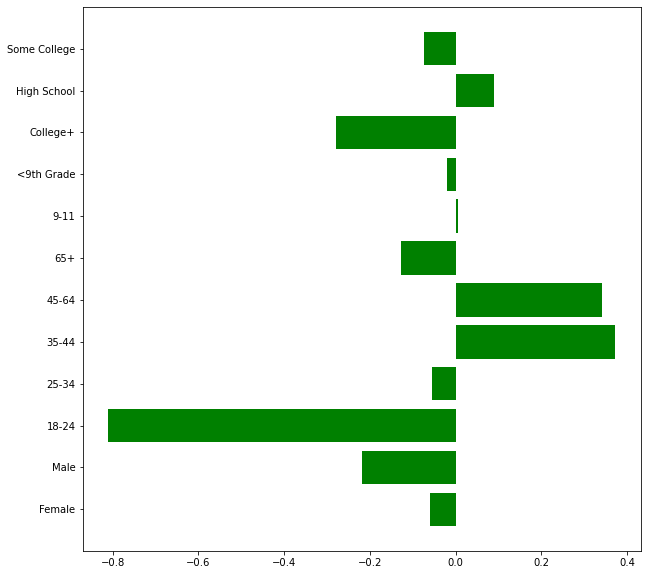

In [ ]:
# features with near zero coefficients indicate the model found those features unimportant

importance = clf.coef_.flatten()
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(df3.columns, importance,color='g')
plt.show()

<Figure size 720x720 with 0 Axes>

(-0.01, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

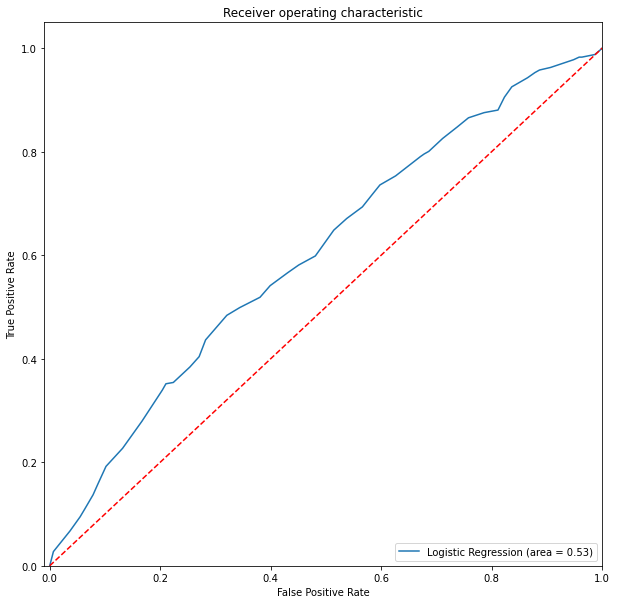

In [ ]:
#We calculate the roc auc
logit_roc_auc = roc_auc_score(df['Obesity'], clf.predict(df3))

#We create the roc curve
fpr, tpr, thresholds = roc_curve(df['Obesity'], clf.predict_proba(df3)[:,1])

#We plot the curve and the score :
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plot the random guess classifier performance
plt.plot([0, 1], [0, 1],'r--')

#Set x, y limits, labels, titles and legend :
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

#If you need to save the figure for later user (final report perhaps) :
plt.savefig('Log_ROC')

plt.show()

Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 69.0, '\nPredicted Values')

Text(69.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'Not Obese'), Text(1.5, 0, 'Obese')]

[Text(0, 0.5, 'Not Obese'), Text(0, 1.5, 'Obese')]

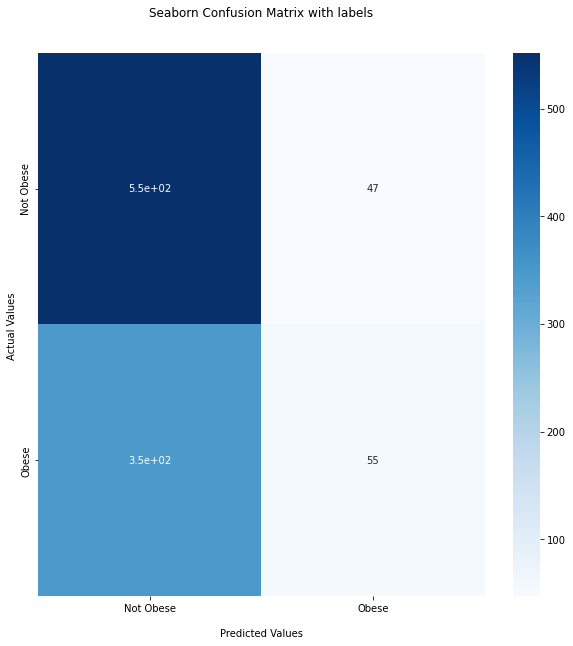

In [ ]:
ax = sns.heatmap(confusion_matrix(df['Obesity'], clf.predict(df3)), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Obese','Obese'])
ax.yaxis.set_ticklabels(['Not Obese','Obese'])

## Display the visualization of the Confusion Matrix.
plt.show()

### That improved the score from 59.9% to 60.7% and it improved the ROC from 0.50 to 0.53.  However, the data is almost all predicting to zero.

Let try the statsmodels so we can get p-values and pseudo R^2

In [ ]:
df3

,Female,Male,18-24,25-34,35-44,45-64,65+,9-11,<9th Grade,College+,High School,Some College
0,1,0,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,0,1,0,0,0
996,0,1,0,0,0,1,0,0,0,0,1,0
997,0,1,1,0,0,0,0,0,0,1,0,0
998,1,0,0,0,0,0,1,0,0,1,0,0


### New Model with categorical values improves the psuedo R^2 and the LLR p-value, but each coefficient has a terrible p-value.

In [ ]:
import statsmodels.api as sm
df3 = sm.add_constant(df3)
logit_model=sm.Logit(df['Obesity'],df3)
result=logit_model.fit()
print(result.summary())
y_pred = round(result.predict(df3))

print("\n",classification_report(df['Obesity'],round(result.predict(df3))))  # predict gives the percentage, so round gives 0 or 1
print("accuracy score: ",accuracy_score(df['Obesity'], round(result.predict(df3))))

Optimization terminated successfully.
         Current function value: 0.657455
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                Obesity   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      990
Method:                           MLE   Df Model:                            9
Date:                Thu, 12 May 2022   Pseudo R-squ.:                 0.02370
Time:                        18:36:21   Log-Likelihood:                -657.46
converged:                       True   LL-Null:                       -673.42
Covariance Type:            nonrobust   LLR p-value:                 0.0002056
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2772   2.92e+06  -9.49e-08      1.000   -5.72e+06    5.72e+06
Female          -0.058

C:\Users\donda\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

Mean prediction:  0.4010000000000002


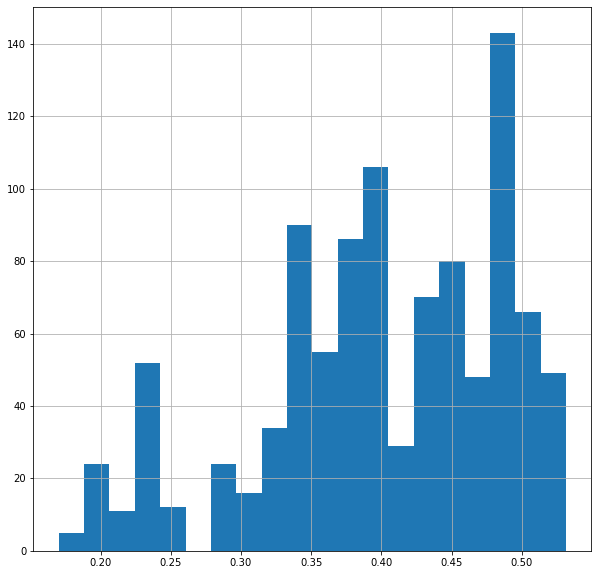

In [ ]:
result.predict(df3).hist(bins=20)
print("Mean prediction: ", result.predict(df3).mean())

Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 69.0, '\nPredicted Values')

Text(69.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'Not Obese'), Text(1.5, 0, 'Obese')]

[Text(0, 0.5, 'Not Obese'), Text(0, 1.5, 'Obese')]

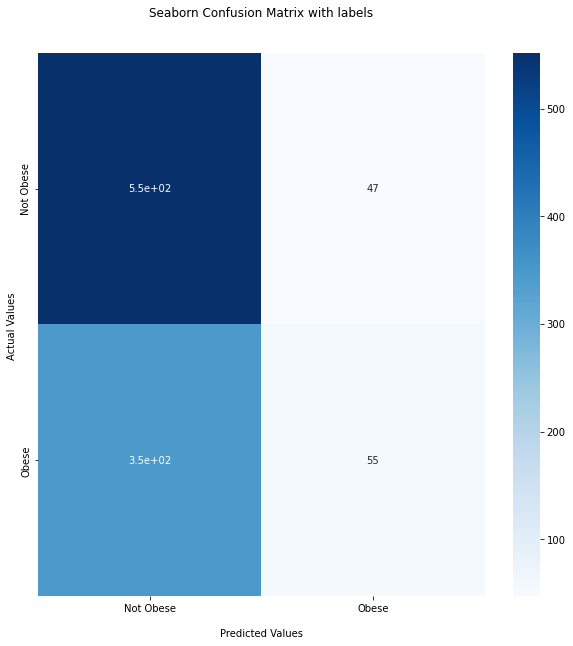

In [ ]:
ax = sns.heatmap(confusion_matrix(df['Obesity'], round(result.predict(df3))), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Obese','Obese'])
ax.yaxis.set_ticklabels(['Not Obese','Obese'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Lets balance the datasets so there are an equal number of obese and not obese using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

#We create a SMOTE object with a fixed random state for consistent results :
os = SMOTE(random_state=0)

#We fit the SMOTE object on our X_train, y_train data :
X,y=os.fit_resample(df3, df['Obesity'])
X  # note size of X and y are equal
y
print("\nSum of y values: ",y.sum())  # there are an equal numer of 1's and zero's in the data set (599 each, total length 1198)

,const,Female,Male,18-24,25-34,35-44,45-64,65+,9-11,<9th Grade,College+,High School,Some College
0,1.0,1,0,0,0,0,0,1,0,0,0,0,1
1,1.0,1,0,0,0,0,1,0,0,0,0,0,1
2,1.0,0,1,0,0,0,1,0,0,0,0,0,1
3,1.0,0,1,1,0,0,0,0,0,0,0,0,1
4,1.0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1.0,0,1,0,0,0,0,0,0,0,0,0,1
1194,1.0,0,1,0,0,0,1,0,0,0,1,0,0
1195,1.0,0,1,0,0,0,0,1,1,0,0,0,0
1196,1.0,0,1,0,0,0,1,0,0,0,0,0,1


0       1
1       0
2       1
3       1
4       0
       ..
1193    1
1194    1
1195    1
1196    1
1197    1
Name: Obesity, Length: 1198, dtype: int64


Sum of y values:  599


In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())
y_pred = round(result.predict(X))

print("\n",classification_report(y,round(result.predict(X))))  # predict gives the percentage, so round gives 0 or 1
print("accuracy score: ",accuracy_score(y, round(result.predict(X))))

         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Obesity   No. Observations:                 1198
Model:                          Logit   Df Residuals:                     1185
Method:                           MLE   Df Model:                           12
Date:                Thu, 12 May 2022   Pseudo R-squ.:                    -inf
Time:                        18:36:21   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -830.39
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.641e+07        nan        nan        nan         nan         nan
Female       -3.903e+07        nan        nan        nan        

C:\Users\donda\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\donda\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\donda\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\donda\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\donda\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


C:\Users\donda\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<AxesSubplot:>

Mean prediction:  0.49929707318750577


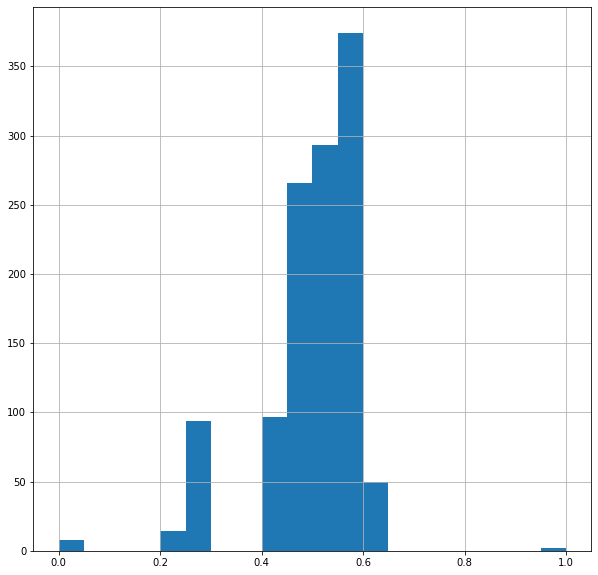

In [ ]:
result.predict(X).hist(bins=20)
print("Mean prediction: ", result.predict(X).mean())

Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 69.0, '\nPredicted Values')

Text(69.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'Not Obese'), Text(1.5, 0, 'Obese')]

[Text(0, 0.5, 'Not Obese'), Text(0, 1.5, 'Obese')]

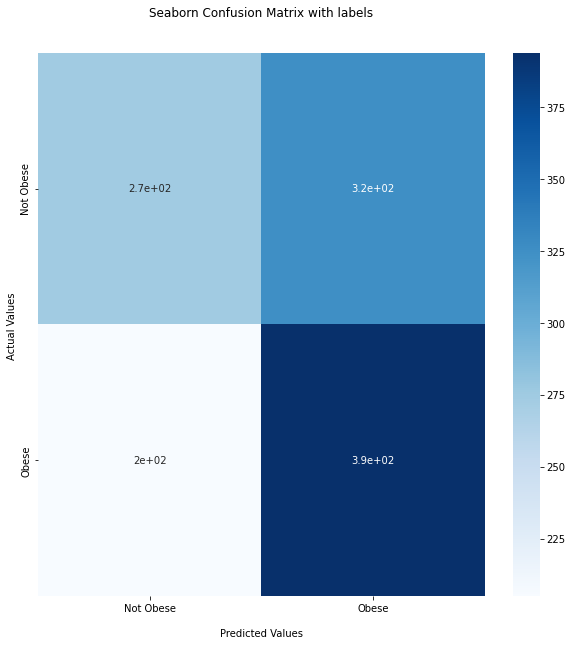

In [ ]:
ax = sns.heatmap(confusion_matrix(y, round(result.predict(X))), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Obese','Obese'])
ax.yaxis.set_ticklabels(['Not Obese','Obese'])

## Display the visualization of the Confusion Matrix.
plt.show()